<a href="https://colab.research.google.com/github/mfilipak/AFRAC_IA/blob/main/NFCE_XML_TO_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Lê um arquivo de NFCe bruto.


In [2]:
from glob import glob
import pandas as pd
 
try:
  import xmltodict
except:
  !pip install xmltodict
  import xmltodict
  None

In [3]:
#Copia a NFCe amostra pro drive virtual.
import requests  
file_url = "https://raw.githubusercontent.com/mfilipak/AFRAC_IA/main/sample.xml"
r = requests.get(file_url, stream = True) 

with open("sample.xml", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)
xml_file = "sample.xml"
xml_file

'sample.xml'

In [4]:
#Pra usar uma NFCe do seu drive local descomente e rode o código abaixo
"""
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
xml_file = name
xml_file
"""

'\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\nxml_file = name\nxml_file\n'

<br><br>
# 2 - Converte para dataframe. Visualização padrão

In [15]:
with open(xml_file) as fd:
    doc = xmltodict.parse(fd.read())
str(doc)[:500],"..."

("OrderedDict([('nfeProc', OrderedDict([('@xmlns', 'http://www.portalfiscal.inf.br/nfe'), ('@versao', '4.00'), ('NFe', OrderedDict([('@xmlns', 'http://www.portalfiscal.inf.br/nfe'), ('infNFe', OrderedDict([('@Id', 'NFe33200531698759000202650070000271731130573000'), ('@versao', '4.00'), ('ide', OrderedDict([('cUF', '33'), ('cNF', '13057300'), ('natOp', 'Venda de Mercadorias'), ('mod', '65'), ('serie', '7'), ('nNF', '27173'), ('dhEmi', '2020-05-15T18:50:08-03:00'), ('tpNF', '1'), ('idDest', '1'), ('",
 '...')

In [6]:
#NOTES:
#Remover dos arquivos do dataset minimamente: doc['nfeProc']["NFe"]["infNFe"]["dest"]
#Remover também o grupo infRespTec comentário adicionado por Filipak na reunião

In [7]:
df = pd.DataFrame()
for ind, item in enumerate(doc["nfeProc"]['NFe']['infNFe']['det']):
    df = df.append(item["prod"], ignore_index=True)
df = df.fillna(0)
df[:3]

,CFOP,NCM,cEAN,cEANTrib,cProd,indTot,qCom,qTrib,uCom,uTrib,vProd,vUnCom,vUnTrib,xProd,vDesc,cBenef
0,5102,04041000,7896212500192,7896212500192,114588,1,1.0000,1.0000,UN,UN,2.79,2.7900000000,2.7900000000,Mistura Lactea Condensada Cristina 395g,0,0
1,5102,21069090,7898079292999,7898079292999,29734,1,10.0000,10.0000,UN,UN,29.90,2.9900000000,2.9900000000,Geleia Mocoto Italianinho t Frutti Tp220,2.00,0
2,5102,04015021,7896183210120,7896183210120,24031,1,4.0000,4.0000,UN,UN,8.76,2.1900000000,2.1900000000,Creme Leite Gloria Tp 200g,0.40,0


<br><br>
# 3 - Visualização de Dataframes do COLAB

In [8]:
#https://pbpython.com/dataframe-gui-overview.html - Fonte de alguns viewers interessantes de dataframes
%load_ext google.colab.data_table
df

,CFOP,NCM,cEAN,cEANTrib,cProd,indTot,qCom,qTrib,uCom,uTrib,vProd,vUnCom,vUnTrib,xProd,vDesc,cBenef
0,5102,04041000,7896212500192,7896212500192,114588,1,1.0000,1.0000,UN,UN,2.79,2.7900000000,2.7900000000,Mistura Lactea Condensada Cristina 395g,0,0
1,5102,21069090,7898079292999,7898079292999,29734,1,10.0000,10.0000,UN,UN,29.90,2.9900000000,2.9900000000,Geleia Mocoto Italianinho t Frutti Tp220,2.00,0
2,5102,04015021,7896183210120,7896183210120,24031,1,4.0000,4.0000,UN,UN,8.76,2.1900000000,2.1900000000,Creme Leite Gloria Tp 200g,0.40,0
3,5405,21050010,7891000120507,7891000120507,49611,1,1.0000,1.0000,UN,UN,14.90,14.9000000000,14.9000000000,Sorvete Nestle Creme 1 5l,0,0
4,5405,21050010,7891000120521,7891000120521,49638,1,1.0000,1.0000,UN,UN,14.90,14.9000000000,14.9000000000,Sorvete Nestle Flocos 1 5l,0,0
5,5102,02013000,SEM GTIN,SEM GTIN,23345,1,1.2760,1.2760,KG,KG,24.22,18.9800000000,18.9800000000,Paleta Bov Friboi Peca Kg,0,RJ802164
6,5102,02013000,SEM GTIN,SEM GTIN,23345,1,1.5140,1.5140,KG,KG,28.74,18.9800000000,18.9800000000,Paleta Bov Friboi Peca Kg,0,RJ802164
7,5405,04051000,7897569614075,7897569614075,44644,1,2.0000,2.0000,UN,UN,27.96,13.9800000000,13.9800000000,Manteiga Kreminas C Sal 500g,0,0
8,5102,04069030,SEM GTIN,SEM GTIN,63851,1,0.5100,0.5100,KG,KG,18.35,35.9800000000,35.9800000000,Queijo Padrao Vitoria Kg,0,0
9,5405,22029900,7891999000521,7891999000521,76449,1,4.0000,4.0000,UN,UN,13.16,3.2900000000,3.2900000000,Bebida Lactea Vigor Coco 540g,0.40,0


In [9]:
df[["cEAN", "NCM", "xProd", "vProd"]]

,cEAN,NCM,xProd,vProd
0,7896212500192,04041000,Mistura Lactea Condensada Cristina 395g,2.79
1,7898079292999,21069090,Geleia Mocoto Italianinho t Frutti Tp220,29.90
2,7896183210120,04015021,Creme Leite Gloria Tp 200g,8.76
3,7891000120507,21050010,Sorvete Nestle Creme 1 5l,14.90
4,7891000120521,21050010,Sorvete Nestle Flocos 1 5l,14.90
5,SEM GTIN,02013000,Paleta Bov Friboi Peca Kg,24.22
6,SEM GTIN,02013000,Paleta Bov Friboi Peca Kg,28.74
7,7897569614075,04051000,Manteiga Kreminas C Sal 500g,27.96
8,SEM GTIN,04069030,Queijo Padrao Vitoria Kg,18.35
9,7891999000521,22029900,Bebida Lactea Vigor Coco 540g,13.16


<br><br>
# 4 - Visualização usando DTALE

In [11]:
try:
  import dtale
  import dtale.app as dtale_app
except:
  !pip install dtale
  import dtale
  import dtale.app as dtale_app
  dtale_app.USE_COLAB = True

In [12]:
dtale.show(df, ignore_duplicate=True)
#??dtale.show(df)

https://hi4ltyi22r-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

Exemplo de visualização:
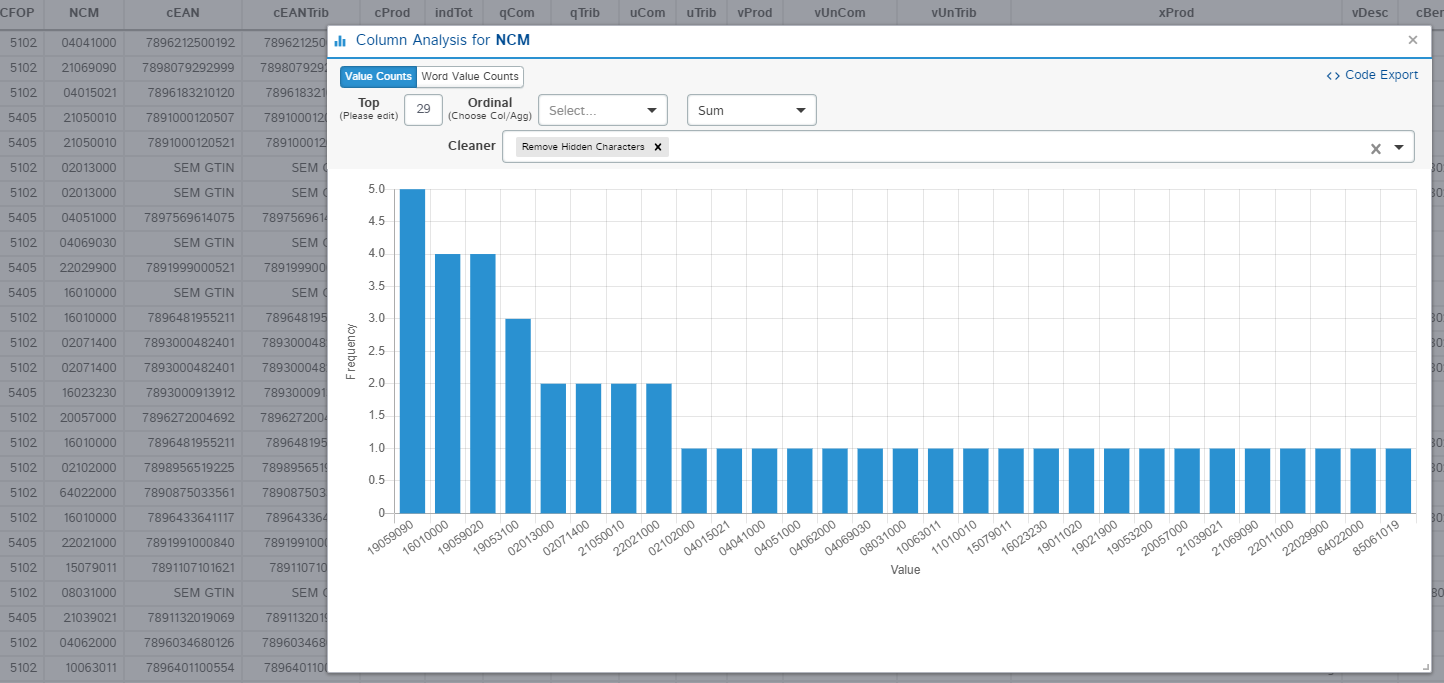